# Project : Real estate market in Bangladesh (exploratory analysis)

<span id="toc"></span>

## Table of Contents

1. [Introduction](#intro)
1. [Preliminary Data Wrangling](#wrangling)
1. [Exploratory Data Analysis](#eda)
1. [Conclusions](#conclusion)

[TOC](#toc)

## Introduction
We are going to investigate scrapped properties datasets in order to gain insights on Bangladesh's real estate market. The goal is to build an intuition on the collected data, and prepare a foundation for our model building stage. In particular, we will be interested in the following questions:
1. [Distribution of properties per city](#properties-vs-cities) (Interpretation [here](#properties-vs-cities-interpretation)) (Group 04)
1. [Distribution of properties per type (shop, apartment, ...)](#properties-vs-types) (Group 04)
1. [Distribution of properties per nature (residential, commercial)](#properties-vs-natures) (Group 04)
1. [Distribution of property price per type (shop, apartment, ...)](#price-vs-types) (Group 04)
1. [Distribution of property price per nature (residential, commercial)](#price-vs-natures) (Group 04)
1. [Impact of basic facilities (e.g. number of baths/rooms on) on the prices](#basic-facilities--vs--prices) (Group 02)
1. [Impact of facilities (malls, educational institutions, ...) in the vicinity on the prices](#facilities-vs-prices) (Group 02)
1. [Impact of internal amenities (play area, number of car parks, ...) on the prices](#amenities-vs-prices) (Group 02)
1. [How do facilities and amenities influence the prices: linearly / non-linearly / stepwise?](#amenities-facilities-prices-relationship) (Group 02)
1. [Is it worth it to be interested in building types (shop, apartment, ...), or is building nature enough to explain the prices ?](#types-vs-prices-worth) (Group 02)
1. [How do property prices fluctuate for same location?](#prices-vs-locations) (Group 03)
1. [How do property prices fluctuate for same property size?](#prices--vs--properties-size) (Group 03)
1. [How do property prices fluctuate for same / similar amenities?](#prices-vs-amenities) (Group 03)
1. [Which amenities are the more frequent in Residential properties ?](#amenities--vs--residential-properties) (Group 03)
1. [Which amenities are the more frequent in Commercial properties ?](#amenities--vs--commercial-properties) (Group 03)
1. [Which amenities have the more impact on price?](#amenities-impact-on-price) (Group 03)


> **Report date : May, 2023**     
> **Created by : `Task 03 - EDA`'s Collaborators and (co-)leads**


In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

<span id="wrangling"></span>
[TOC](#toc)  

## Preliminary Data Wrangling
        

### General Properties                
Our main data come from over 20+ different real estate website (in Bangladesh) which were scrapped. After cleaning and merging them, we were left with 33701 samples for 22 attributes.

Let's load the dataset.

In [2]:
# CSVs folder
merged_data_folder="../../data/Merged_Data"

In [3]:
# Load the merged dataset
df = pd.read_csv(f"{merged_data_folder}/cleaned_merged_datasets.csv")
df.head(2).T

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1
area,1185.0,2464.0
building_type,Apartment,Apartment
building_nature,Residential,Residential
image_url,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...
num_bath_rooms,0.0,4.0
num_bed_rooms,3.0,3.0
price,6100000.0,28900000.0
property_description,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,A Vibrant 2464 Sq Ft Residential Flat For Sale...
property_overview,This flat consists of facilities you can think...,Ready to move in somewhere with everything nea...
property_url,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...


In [4]:
df.shape

(33701, 22)

### Structure of the dataset
We have 22 features, which are:
* **area**: the area occupied by the property, in sqft
* **building_type**: the type of the property (shop, apartment, duplex, ...)
* **building_nature**: the nature of the property (residential, commercial)
* **image_url**: the link toward the property's image

TODO: add the other features.

In [5]:
# Structure of the properties dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [6]:
# Check N/A values count for each feature
df.isna().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

In [7]:
# Check null values count for each feature
df.isnull().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

N/A check and null check are giving the same result, so there is nothing to worry about there underlying content. As for the missing values, we should not worry about them since we don't need them in our EDA.

### Data assessement and cleaning

One thing to take note of is that this dataset has already been cleaned (in Task 02). So we will skip this section.

<span id="eda"></span>

[TOC](#toc)               
## Exploratory Data Analysis

<span id="properties-vs-cities"></span>

[EDA](#eda)  
### 1. Distribution of properties per city 
The goal is to know which cities we can make prediction for, as well as understand the how properties are distributed over those cities.      
This question was explored by Group 04.

In [8]:
# Number of properties per city
properties_per_city = df["city"].value_counts()
properties_per_city

Dhaka               28681
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Rangpur                73
Dinajpur               64
Sylhet                 57
Rajshahi               56
Narayanganj            49
Khulna                 39
Thakurgaon              8
Bogura                  8
Mymensingh              8
Cumilla                 5
Barguna                 4
Manikganj               4
Magura                  4
Narsingdi               4
Chittagong              4
Chandpur                3
Jashore                 3
Kushtia                 3
Nilphamari              2
Brahmanbaria            2
Noakhali                2
Tangail                 2
Madaripur               2
Moulvibazar             2
Sirajganj               1
Shariatpur              1
Bandarban               1
Feni                    1
Kishoreganj             1
Jamalpur                1
Gopalganj               1
Naogaon                 1
Sherpur                 1
Joypurhat   

Let's plot the result in order to read it better.

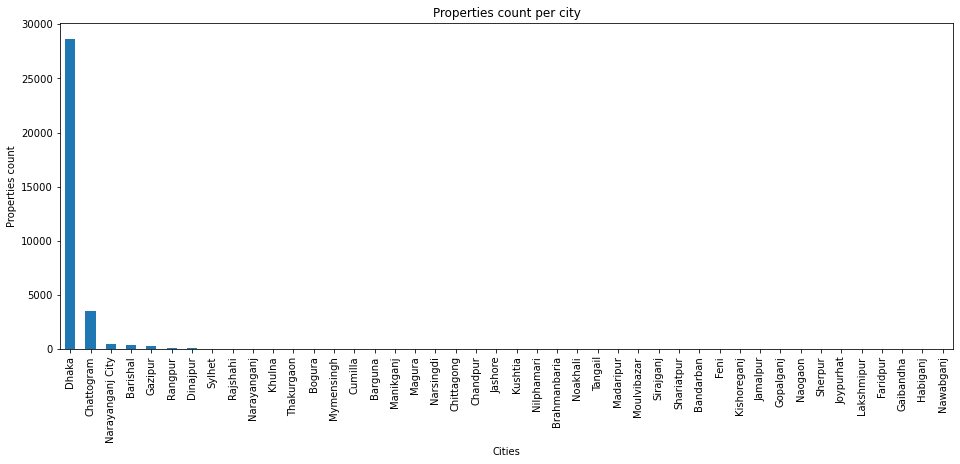

In [9]:
# Plotting properties count per cities
properties_per_city.plot(kind="bar", figsize=(16,6))

plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per city");

Let's improve the above plot to make it easier to read.

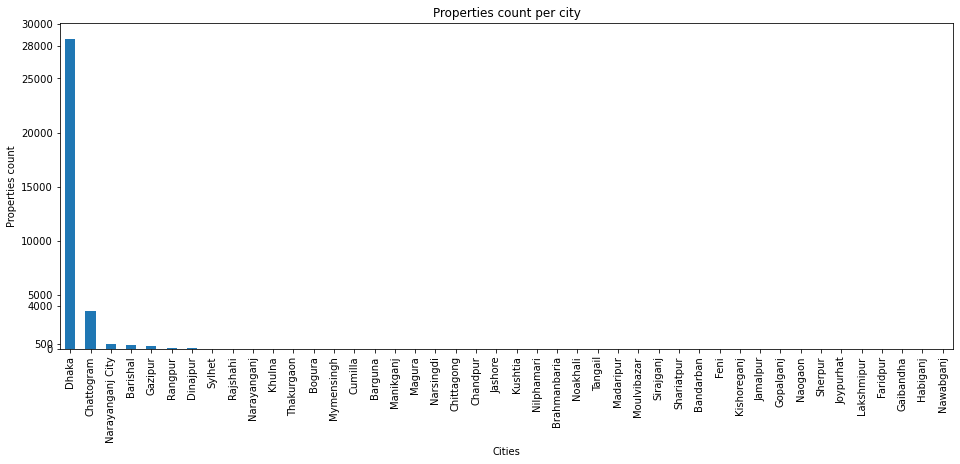

In [10]:
# Plotting properties count per cities
properties_per_city.plot(kind="bar", figsize=(16,6))

y_ticks = [0, 500, 4000, 5000, 10000, 15000, 20000, 25000, 28000, 30000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])


plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per city");

<span id="properties-vs-cities-interpretation"></span>

1. Most of our properties are in `Dhaka`, for a total of nearly 28,000 properties. We also have nearly 4000 properties in `Chattogram`.     
1. A negligible amount of properties are in `Narayanganj City`, `Barishal`, `Gazipur`, each of them with a count below 500 properties ..
1. As for the other cities, their properties count is too insignificant.

<br/>

❗ **Recommendation**:
* We are expecting our future models not to be perform well on cities mentioned in (2). We should 
* Cities not part of (1) and (2) should be dropped in order to avoid noise in our future models

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analsis (or in our presention).